In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

np.set_printoptions(precision=3, suppress=True)


In [2]:
train_dataset = pd.read_csv("f_covae_training.tsv", na_values='?', sep="\t")
test_dataset = pd.read_csv("f_covae_test.tsv", na_values='?', sep="\t")

train_df = train_dataset.copy()
test_df = test_dataset.copy()

In [3]:
# Preparing the data
train_df = train_df.iloc[:, 2:]  # Remove the first column (ID)
test_df = test_df.iloc[:, 2:] 

# Split the data into training and validation sets
X = train_df.iloc[:, :-697]  # Features
y = train_df.iloc[:, -697:]  # Labels

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# Prep test data
X_test = test_df.iloc[:, :-697]
y_test = test_df.iloc[:, -697:] 

In [4]:
# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(697, activation='sigmoid')) 

In [5]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/10
41/41 [==============================] - 1s 7ms/step - loss: 159.1467 - accuracy: 0.0031 - val_loss: 2.7368 - val_accuracy: 0.0215
Epoch 2/10
41/41 [==============================] - 0s 3ms/step - loss: 2.3732 - accuracy: 0.0285 - val_loss: 2.1462 - val_accuracy: 0.0308
Epoch 3/10
41/41 [==============================] - 0s 3ms/step - loss: 1.7951 - accuracy: 0.0162 - val_loss: 1.7762 - val_accuracy: 0.0062
Epoch 4/10
41/41 [==============================] - 0s 3ms/step - loss: 1.4272 - accuracy: 0.0177 - val_loss: 1.4975 - val_accuracy: 0.0185
Epoch 5/10
41/41 [==============================] - 0s 3ms/step - loss: 1.1861 - accuracy: 0.0147 - val_loss: 1.3419 - val_accuracy: 0.0277
Epoch 6/10
41/41 [==============================] - 0s 3ms/step - loss: 0.9884 - accuracy: 0.0247 - val_loss: 1.2015 - val_accuracy: 0.0338
Epoch 7/10
41/41 [==============================] - 0s 2ms/step - loss: 0.8452 - accuracy: 0.0177 - val_loss: 1.1194 - val_accuracy: 0.0123
Epoch 8/10
41/41 [

In [7]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)

35/35 [==============================] - 0s 1ms/step - loss: 0.1647 - accuracy: 0.0018
Accuracy: 0.0018348623998463154


In [8]:
# Make predictions
predictions = model.predict(X_test)

35/35 [==============================] - 0s 997us/step


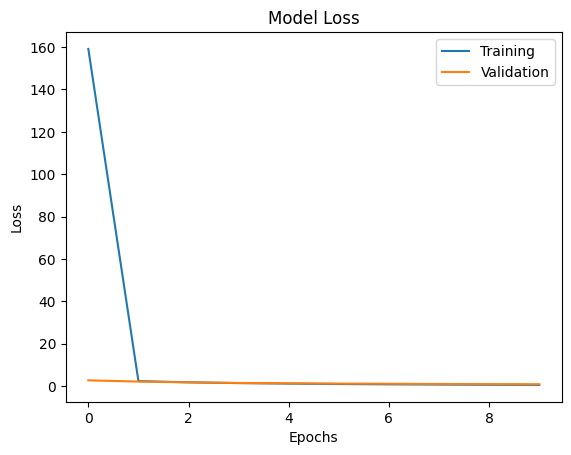

In [9]:
# Plot training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

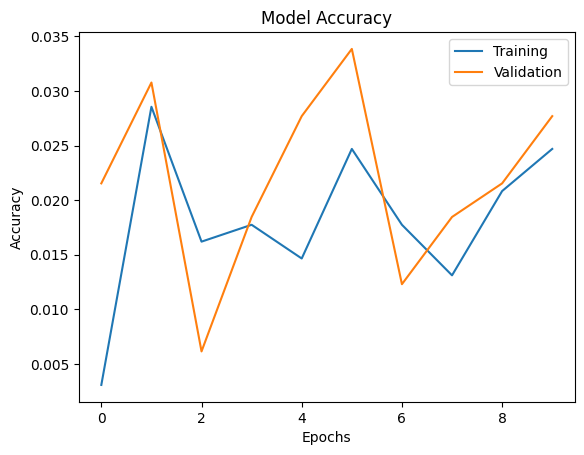

In [10]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()